In [19]:
import pandas as pd

try:
    df = pd.read_csv('data.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'data.csv' not found.")
    df = None # Set df to None to indicate failure
except pd.errors.EmptyDataError:
    print("Error: 'data.csv' is empty.")
    df = None
except pd.errors.ParserError:
    print("Error: 'data.csv' parsing error.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


(569, 33)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

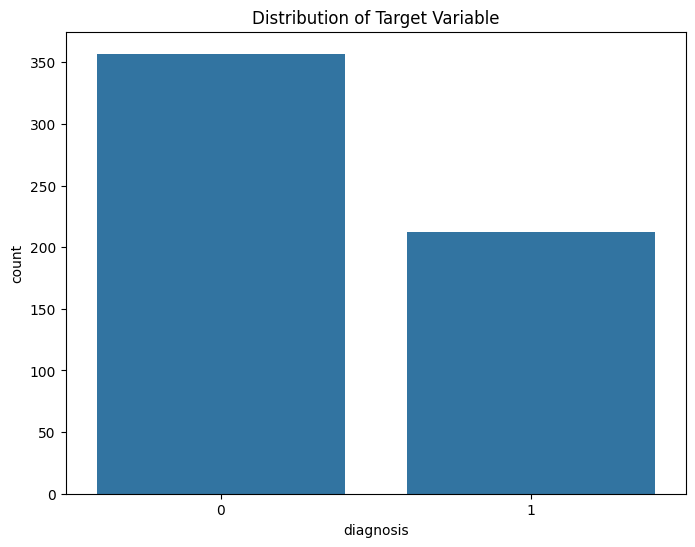

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

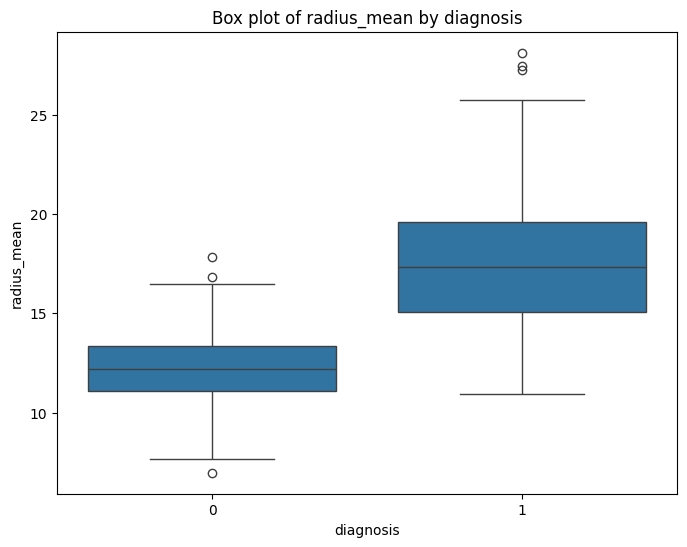

Number of duplicated rows: 0


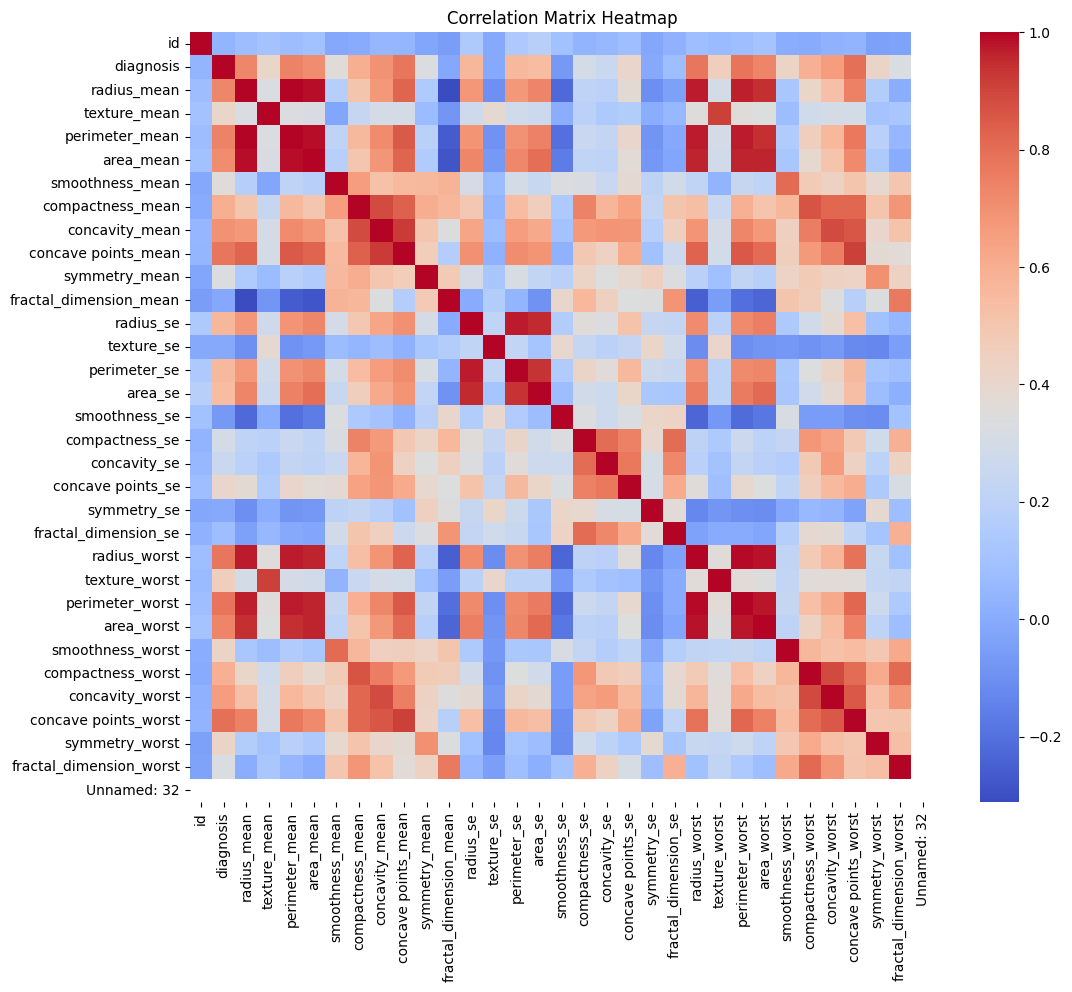

## Data Exploration Report
Shape of the data: (569, 33)


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas here as well for clarity

# 1. Data Types and Target Variable
print(df.info())
target_variable = 'diagnosis'  # Identify the target variable

# Convert diagnosis to numerical values (M=1, B=0)
# This line was moved up from a later cell to be executed before correlation calculation
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


# 2. Summary Statistics of Numerical Features
print(df.describe())

# 3. Target Variable Distribution
print(df[target_variable].value_counts())
plt.figure(figsize=(8, 6))
# Use the now numerical target_variable for countplot as well
sns.countplot(x=target_variable, data=df)
plt.title('Distribution of Target Variable')
plt.show()


# 4. Missing Values
print(df.isnull().sum())

# 5. Potential Outliers (example with box plot for 'radius_mean')
plt.figure(figsize=(8, 6))
# Use the now numerical target_variable for boxplot as well
sns.boxplot(x=target_variable, y='radius_mean', data=df)
plt.title('Box plot of radius_mean by diagnosis')
plt.show()

# 6. Duplicate Rows
print("Number of duplicated rows:", df.duplicated().sum())

# 7. Correlation Matrix and Heatmap
# Select only numerical columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Report
print("## Data Exploration Report")
print(f"Shape of the data: {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

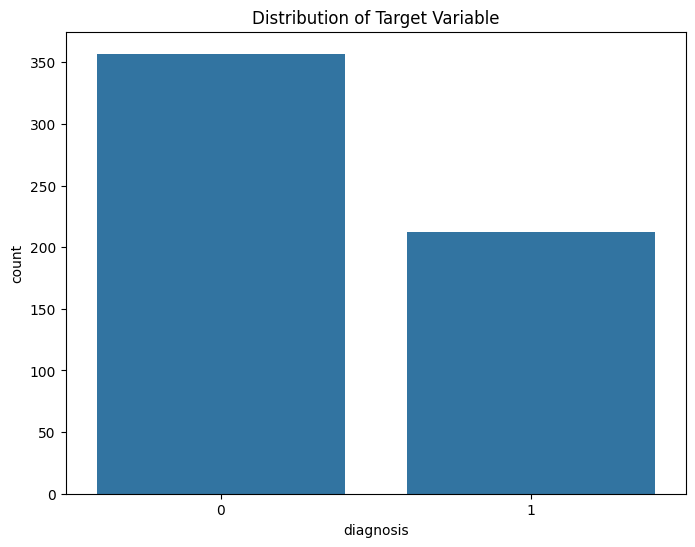

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

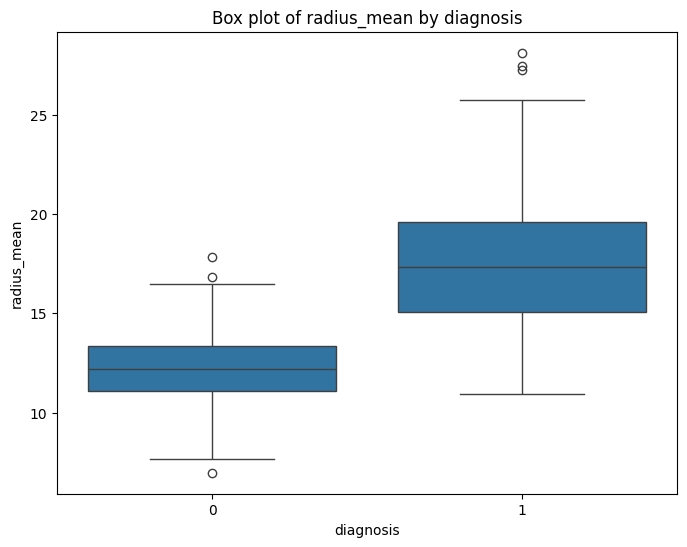

Number of duplicated rows: 0


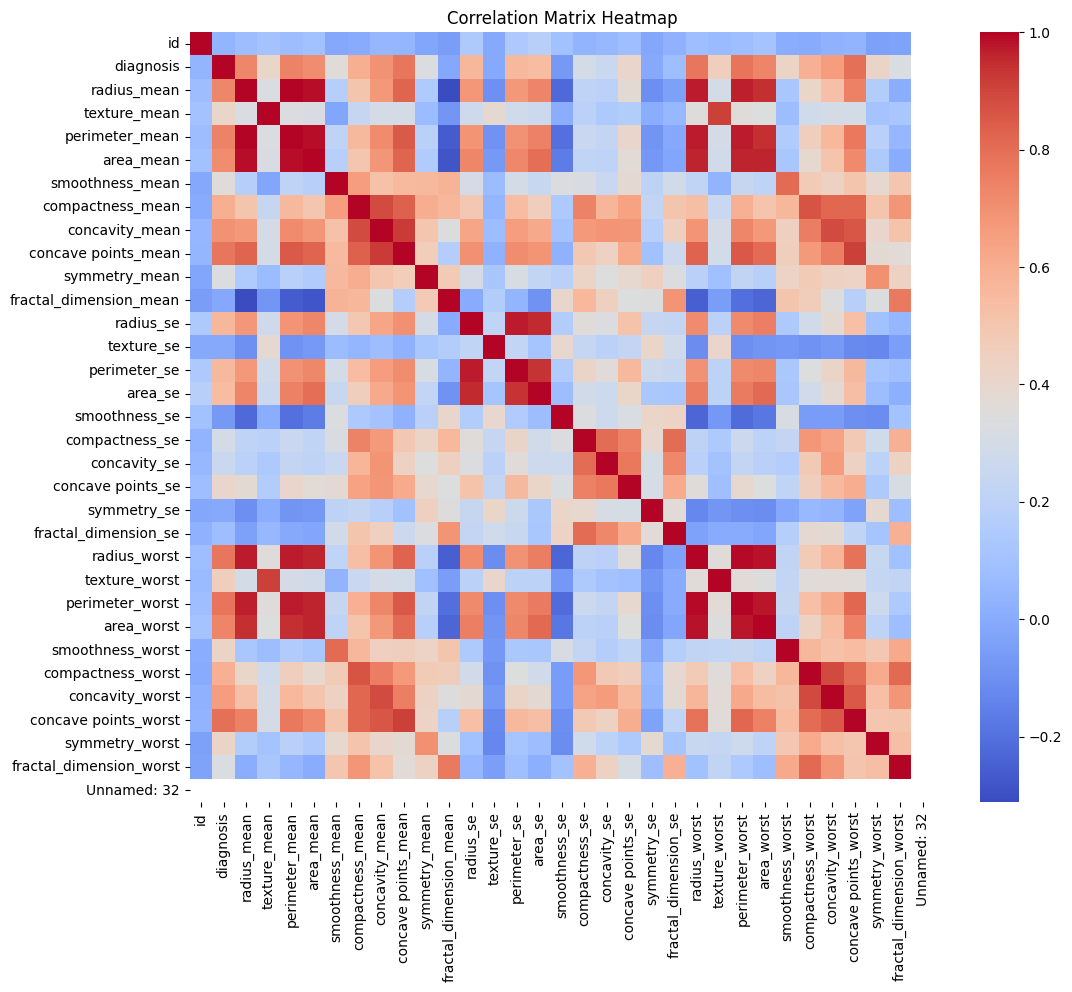

## Data Exploration Report
**Shape of the data:** (569, 33)


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#Improved error handling
try:
    df = pd.read_csv('data.csv')
except FileNotFoundError:
    print("Error: 'data.csv' not found.")
    df = None
except pd.errors.EmptyDataError:
    print("Error: 'data.csv' is empty.")
    df = None
except pd.errors.ParserError:
    print("Error: 'data.csv' parsing error.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

if df is not None:
    # 1. Data Types and Target Variable
    print(df.info())
    target_variable = 'diagnosis'

    # Convert diagnosis to numerical values (M=1, B=0)
    df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

    # 2. Summary Statistics of Numerical Features
    print(df.describe())

    # 3. Target Variable Distribution
    print(df[target_variable].value_counts())
    plt.figure(figsize=(8, 6))
    sns.countplot(x=target_variable, data=df)
    plt.title('Distribution of Target Variable')
    plt.show()

    # 4. Missing Values
    print(df.isnull().sum())

    # 5. Potential Outliers (example with box plot)
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=target_variable, y='radius_mean', data=df)
    plt.title('Box plot of radius_mean by diagnosis')
    plt.show()


    # 6. Duplicate Rows
    print("Number of duplicated rows:", df.duplicated().sum())

    # 7. Correlation Matrix and Heatmap (excluding non-numeric columns)
    numeric_df = df.select_dtypes(include=np.number)
    correlation_matrix = numeric_df.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
    plt.title('Correlation Matrix Heatmap')
    plt.show()

    # Report
    print("## Data Exploration Report")
    print(f"**Shape of the data:** {df.shape}")
else:
    print("Data loading failed. Cannot proceed with exploration.")

In [22]:
import pandas as pd
import numpy as np

# Drop the 'Unnamed: 32' column
if 'Unnamed: 32' in df.columns:
    df = df.drop('Unnamed: 32', axis=1)

# Handle outliers using IQR method for 'radius_mean'
Q1 = df['radius_mean'].quantile(0.25)
Q3 = df['radius_mean'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['radius_mean'] >= lower_bound) & (df['radius_mean'] <= upper_bound)]

# Remove duplicate rows
df = df.drop_duplicates()

# Verify the changes
print(df.isnull().sum())
print("Number of duplicated rows:", df.duplicated().sum())
print("Shape of the DataFrame:", df.shape)

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Number of duplicated rows: 0
Shape of the DataFrame: (555, 

In [23]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (444, 31)
Shape of X_test: (111, 31)
Shape of y_train: (444,)
Shape of y_test: (111,)


In [24]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegression

# Instantiate LogisticRegression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

Confusion Matrix:


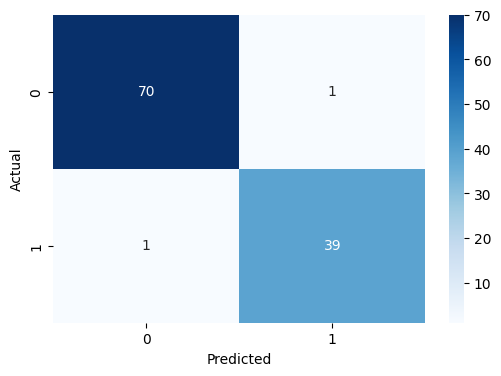

Precision: 0.975
Recall: 0.975
ROC AUC Score: 0.9968309859154929


In [26]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predict probabilities
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Predict class labels
y_pred = model.predict(X_test_scaled)

# Compute evaluation metrics
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print("Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC Score: {roc_auc}")

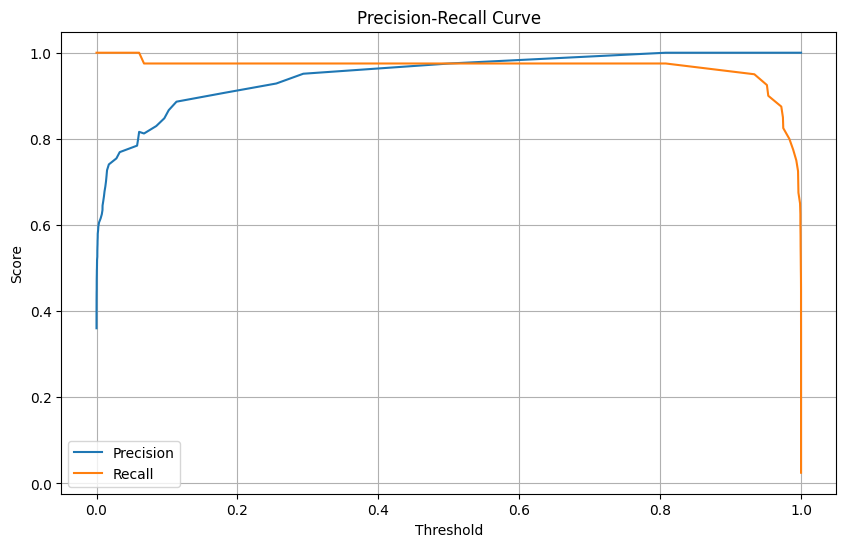

Optimal Threshold based on highest F1-score: 0.6
Performance metrics at the optimal threshold:
Precision: 1.0000
Recall: 0.9750
F1-score: 0.9873
Accuracy: 0.9910


In [27]:
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score
import matplotlib.pyplot as plt

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []

for threshold in thresholds:
    y_pred_tuned = (y_pred_proba >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_tuned)
    recall = recall_score(y_test, y_pred_tuned)
    f1 = f1_score(y_test, y_pred_tuned)
    accuracy = accuracy_score(y_test, y_pred_tuned)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

# Plot Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(thresholds_pr, precision[:-1], label='Precision')
plt.plot(thresholds_pr, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# Find the optimal threshold based on the F1-score
optimal_idx = f1_scores.index(max(f1_scores))
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold based on highest F1-score: {optimal_threshold}")
print(f"Performance metrics at the optimal threshold:")
print(f"Precision: {precision_scores[optimal_idx]:.4f}")
print(f"Recall: {recall_scores[optimal_idx]:.4f}")
print(f"F1-score: {f1_scores[optimal_idx]:.4f}")
print(f"Accuracy: {accuracy_scores[optimal_idx]:.4f}")

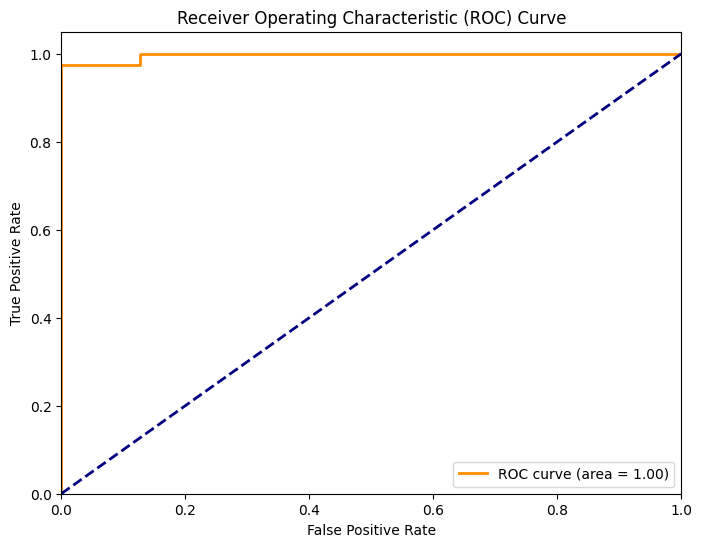

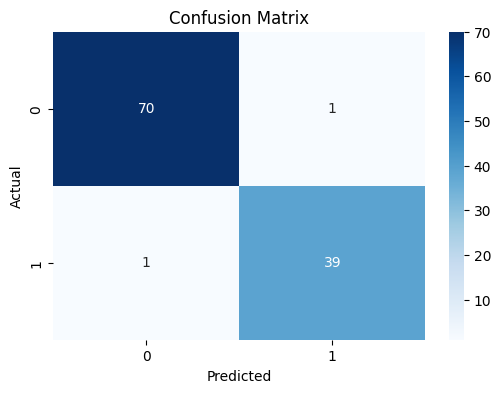

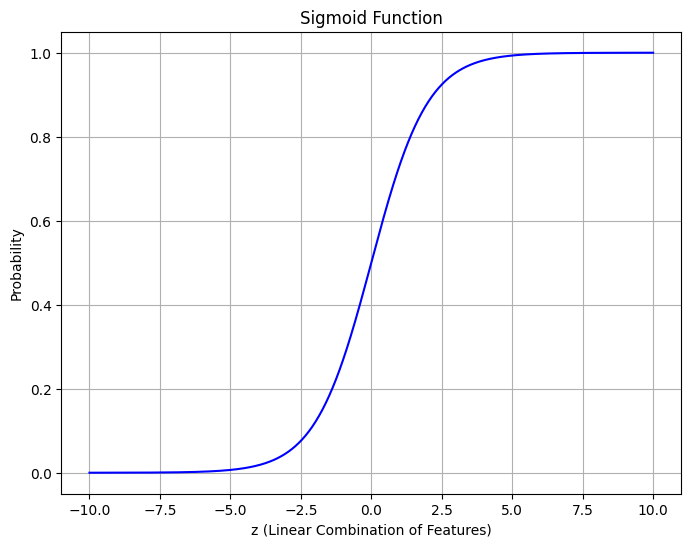

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 3. Sigmoid Function
x = np.linspace(-10, 10, 1000)
y = 1 / (1 + np.exp(-x))

plt.figure(figsize=(8, 6))
plt.plot(x, y, color='blue')
plt.xlabel('z (Linear Combination of Features)')
plt.ylabel('Probability')
plt.title('Sigmoid Function')
plt.grid(True)
plt.show()
